# CAPSTONE:

# SpaceX Falcon 9 First Stage Landing Prediction

## Lab 6:

## Build a Dashboard Application with Plotly Dash

In this lab, you will be building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in real-time.

This dashboard application contains input components such as a dropdown list and a range slider to
interact with a pie chart and a scatter point chart. 

You will be guided to build this dashboard application via the following **tasks**:

- *TASK 1*: Add a Launch Site Drop-down Input Component
<br>


- *TASK 2*: Add a callback function to render `success-pie-chart` based on selected site dropdown
<br>


- *TASK 3*: Add a Range Slider to Select Payload
<br>


- *TASK 4*: Add a callback function to render the `success-payload-scatter-chart` scatter plot


***Note***:Please take screenshots of the Dashboard and save them; upload your notebook to *github*.

The github url and the screenshots are later required in the presentation slides.

Your completed dashboard application should look like the following screenshot:

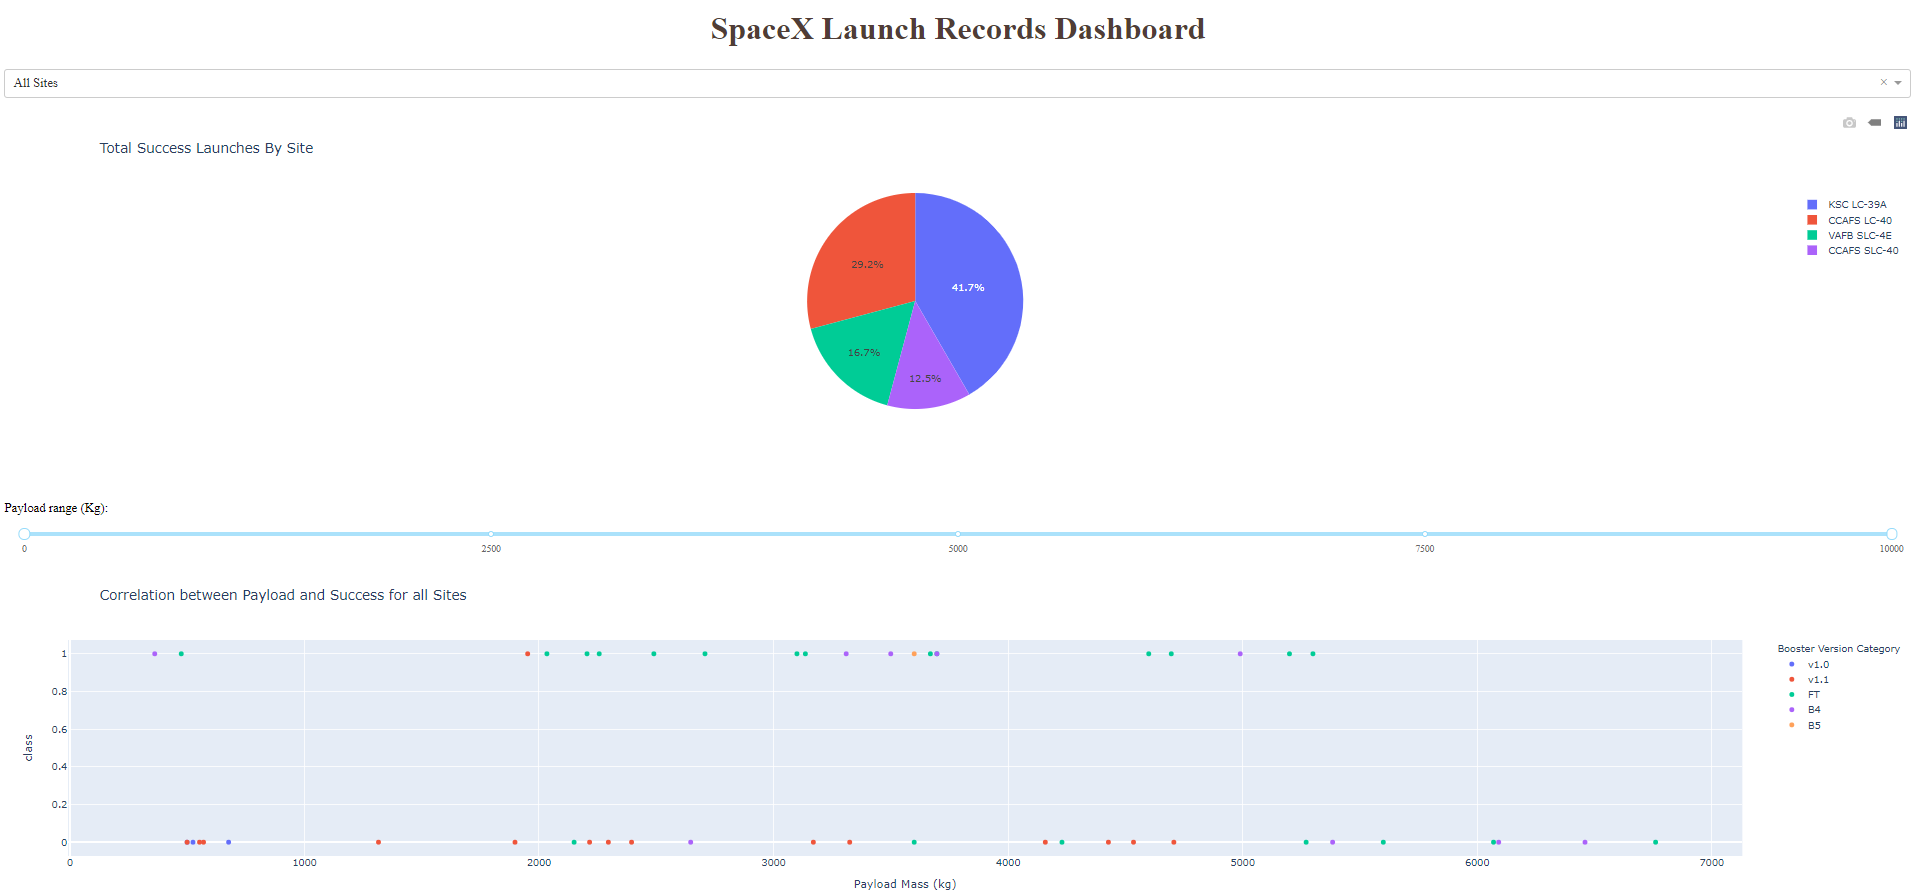

After visual analysis using the dashboard, you should be able to obtain some insights to answer the following five questions:

- Which site has the largest successful launches?
<br>


- Which site has the highest launch success rate?
<br>


- Which payload range(s) has the highest launch success rate?
<br>


- Which payload range(s) has the lowest launch success rate?
<br>


- Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest launch success rate?

### Download a skeleton dashboard application and dataset

First, let’s get the SpaceX Launch dataset for this lab.

Run the following wget command line in the terminal to download dataset as `spacex_launch_dash.csv`.

In [1]:
!curl -o spacex_launch_dash.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2476  100  2476    0     0   1406      0  0:00:01  0:00:01 --:--:--  1406:01 --:--:--     0


Download a skeleton Dash app to be completed in this lab:

In [2]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py

# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                html.Br(),

   

In [3]:
# Import required libraries
import pandas as pd
import dash
from dash.dependencies import Input, Output
import plotly.express as px

In [4]:
from dash import html

from dash import dcc

In [5]:
# Read the SpaceX data into pandas dataframe
spacex_df = pd.read_csv('spacex_launch_dash.csv')

spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [6]:
max_payload = spacex_df['Payload Mass (kg)'].max()
max_payload

9600.0

In [7]:
min_payload = spacex_df['Payload Mass (kg)'].min()
min_payload

0.0

In [8]:
# Create a dash application
app = dash.Dash(__name__)

In [9]:
# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',
                                            options=[
                                                {'label': 'All Sites', 'value': 'ALL'},
                                                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                    ],
                                            value='ALL',
                                            placeholder="Select a Launch Site HERE",
                                            searchable=True
                                            ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(
                                                id='payload-slider',
                                                min=0,
                                                max=10000,
                                                step=1000,
                                                marks={0: '0', 
                                                       2500: '2500', 
                                                       5000: '5000', 
                                                       7500: '7500',
                                                       10000: '10000'},
                                                value=[0, 10000]
    ),
                                html.Div(id='slider-output-container'),
                                html.Br(),
                                
                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

In [10]:
# Callbacks:

# Callback for launch sites dropdown and pie chart
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value'))

def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
                     names='Launch Site', 
                     title='Total Success Launches by Site',
                     color_discrete_map={'0': 'blue', '1': 'red'})
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        success_count = filtered_df[filtered_df['class'] == 1].shape[0]
        failure_count = filtered_df[filtered_df['class'] == 0].shape[0]

        fig = px.pie(
            names=['Success', 'Failure'],
            values=[success_count, failure_count],
            title=f'Success and Failure Counts for {entered_site}',
            color_discrete_map={'Failure': 'blue', 'Success': 'red'}
        )
        
        # Annotation for the third site:
        if entered_site == 'KSC LC-39A':
            fig.update_layout(
                annotations=[
                    dict(
                        text='Please Note: The label/color combination is reversed for this site. The percentage values for labels/colors are correct.',
                        x=0.5,
                        y=-0.3,
                        yref='paper',
                        showarrow=False,
                        #arrowhead=7,
                        ax=0,
                        ay=-40
                    )
                ]
            )

    return fig

In [11]:
# Callback for slider
@app.callback(
    Output('slider-output-container', 'children'),
    Input('payload-slider', 'value')
)
def update_slider_output(value):
    return f'Selected payload range: {value[0]} to {value[1]} Kg'

In [12]:
# Callback for scatter plot
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'), 
     Input(component_id='payload-slider', component_property='value')]
)
def update_scatter_chart(entered_site, payload_range):
    scatter_df = spacex_df.copy()  

    # Apply filtering based on site
    if entered_site != 'ALL':
        scatter_df = scatter_df[scatter_df['Launch Site'] == entered_site]

    # Apply filtering based on payload range
    scatter_df = scatter_df[(scatter_df['Payload Mass (kg)'] >= payload_range[0]) & 
                            (scatter_df['Payload Mass (kg)'] <= payload_range[1])]

    # Create the scatter plot
    fig = px.scatter(scatter_df, 
                     x='Payload Mass (kg)', 
                     y='class', 
                     color='Booster Version Category',
                     hover_name='Booster Version Category', 
                     title=f'Correlation between Payload Mass and Launch Outcome for {entered_site}',
                     size_max=60)

    return fig

if __name__ == '__main__':
    #app.run(jupyter_mode="tab")
    app.run_server(debug=True)
    
    #app.run(jupyter_mode="external")

### TASK 1: Add a Launch Site Drop-Down Input Component

We have four different launch sites and we would like to first see which one has the largest success count. 

Then, we would like to select one specific site and check its detailed success rate (class=0 vs. class=1).

As such, we will need a dropdown menu to let us select different launch sites.

Find and complete a commented `dcc.Dropdown(id='site-dropdown',...)` input with following *attributes*:
- `id` attribute with value `site-dropdown`
<br>

- `options` attribute is a list of dict-like option objects (with `label` and `value` attributes). You can set the `label` and `value` all to be the launch site names in the `spacex_df` and you need to include the default *All* option. e.g., `options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'site1', 'value': 'site1'}, ...]`
<br>

- `value` attribute with default dropdown value to be *ALL* (meaning all sites are selected)
<br>

- `placeholder` attribute to show a text description about this input area, such as *Select a Launch Site here*
<br>

- `searchable` attribute to be True so we can enter keywords to search launch sites

Here is an ***example of `dcc.Dropdown`***:

  <code> dcc.Dropdown(id='id',
                options=[
                    {'label': 'All Sites', 'value': 'ALL'},
                    {'label': 'site1', 'value': 'site1'},
                ],
                value='ALL',
                placeholder="place holder here",
                searchable=True
                ), <code>


Your completed dropdown menu should look like the following screenshot:

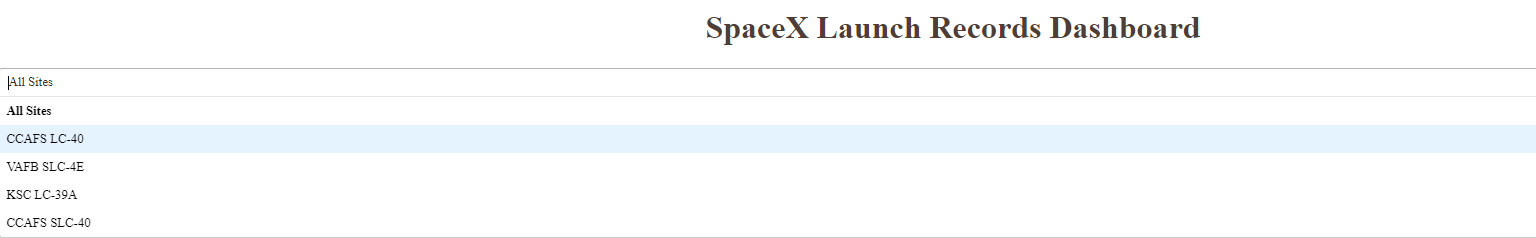

### TASK 2: Add a callback function to render `success-pie-chart` based on selected site dropdown

The general idea of this callback function is to get the selected launch site from site-dropdown and render
a pie chart visualizing launch success counts.

***Dash callback function*** is a type of Python function which will be automatically called by
Dash whenever receiving an input component updates, such as a click or dropdown selecting event.



Let’s add a callback function in *spacex_dash_app.py* including the following application logic:

- Input is set to be the `site-dropdown` dropdown, i.e., `Input(component_id='site-dropdown', component_property='value')`
<br>

- Output to be the graph with id `success-pie-chart`, i.e., `Output(component_id='success-pie-chart', component_property='figure')`
<br>

- An If-Else statement to check if ALL sites were selected or just a specific launch site was selected.

    - If ALL sites are selected, we will use all rows in the dataframe spacex_df to render and return a pie chart graph to show the total success launches (i.e., the total count of class column).
    
    - If a specific launch site is selected, you need to filter the dataframe spacex_df first in order to include the only data for the selected site.
    
    - Then, render and return a pie chart graph to show the success (class=1) count and failed (class=0) count for the selected site.

Here is an example of a callback function:

<code> # Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(data, values='class', 
        names='pie chart names', 
        title='title')
        return fig
    else:
        # return the outcomes piechart for a selected site <code>

The rendered pie chart should look like the following screenshots:

Pie chart if all sites are selected:
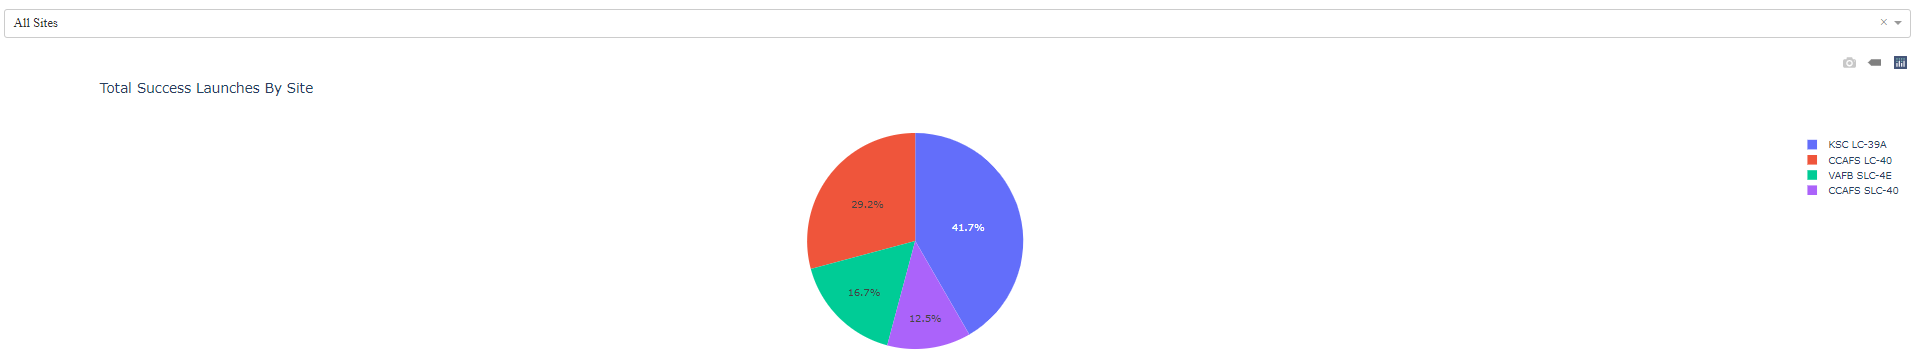

Pie chart if a specific site is selected:
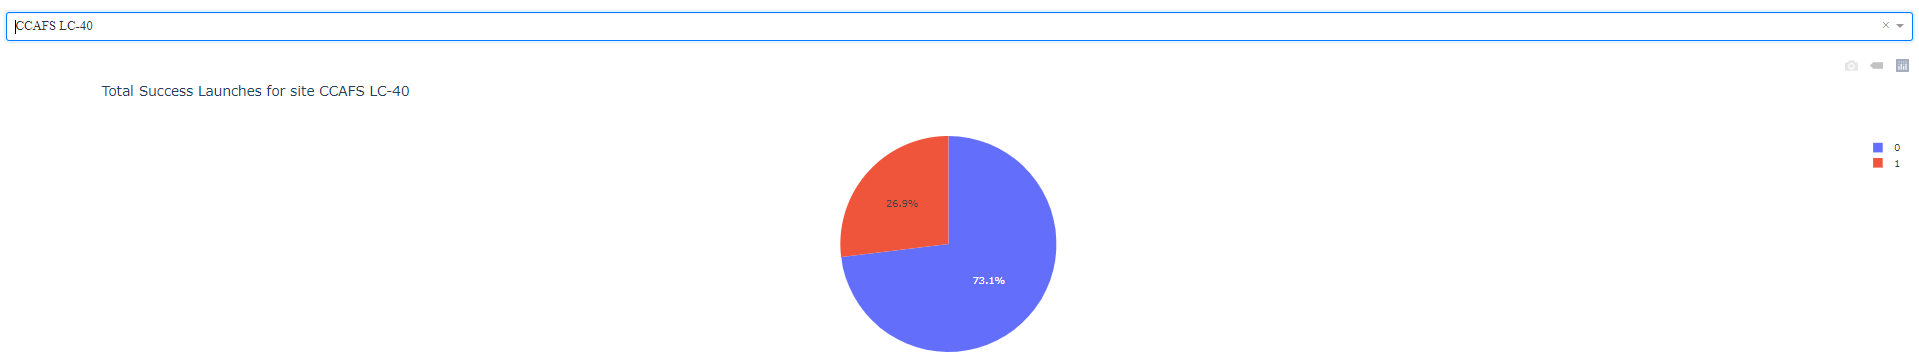

### TASK 3: Add a Range Slider to Select Payload

Next, we want to find if variable 'payload' is correlated to mission outcome. From a dashboard point of view, we want to be able to easily select different payload range to see if we can identify visual patterns.

Find and complete a commented `dcc.RangeSlider(id='payload-slider',...)` input with the following *attributes*:

- `id` to be `payload-slider`;
<br>

- `min` indicating the slider starting point (set at 0.00 Kg);
<br>

- `max` indicating the slider ending point (set at 10,000.00 Kg);
<br>

- `step` indicating the slider interval (set at 1,000.00 Kg);
<br>

- `value` indicating the current selected range (set at `min_payload` and `max_payload`).
<br>

***RangeSlider Example:***

<code>dcc.RangeSlider(id='id',
                min=0, max=10000, step=1000,
                marks={0: '0',
                       100: '100'},
                value=[min_value, max_value])<code>

Your completed payload range slider should be similar the following screenshot:
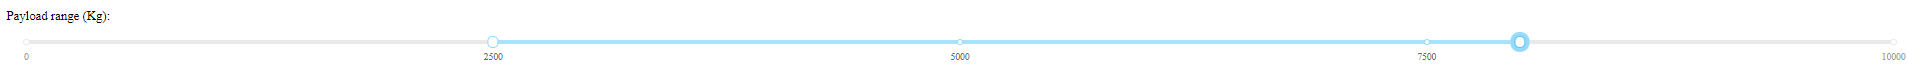


For more info on range slider, refer to the ***Plotly Dash Reference*** towards
the end of this lab.

### TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

Next, we want to plot a scatter plot with the x-axis to be the payload and the y-axis to be the launch outcome (i.e., `class` column) to visually observe how payload may be correlated with mission outcomes for selected site(s).

In addition, we want to *color code the Booster version* on each scatter point to display mission outcomes with different boosters.

Now, let’s add a callback function including the following application logic:

- **Input**:

<code>[Input(component_id='site-dropdown', component_property='value'), 
 Input(component_id="payload-slider", component_property="value")]<code>
    
***Note*** that we have two input components: one to select a launch site, and another to select payload range.
    
- **Output**:

<code>Output(component_id='success-payload-scatter-chart', component_property='figure')<code>
    
- **If-Else Statement** to check if ALL sites were selected or just a specific launch site was selected.
    
    - If `ALL` sites are selected, render a scatter plot to display all values for variable `Payload Mass (kg)` and variable `class`. In addition, the point color needs to be set to the booster version i.e., `color="Booster Version Category"`;
    
    - If a specific launch site is selected, you need to filter the `spacex_df` first, and render a scatter chart to show values for `Payload Mass (kg)` and `class` for the selected site, and color-label the point using `Boosster Version Category`.
        

*You rendered scatter point should look like the following screenshot:*
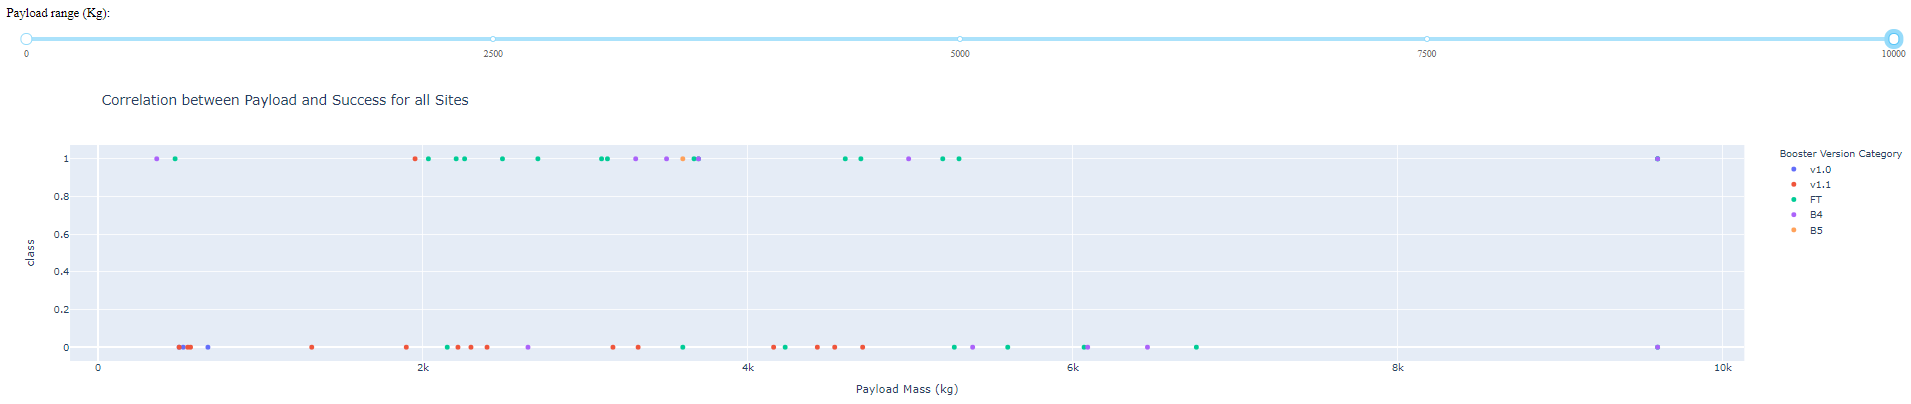